# WATER QUALITY PREDICTION
FINAL PROJECT INDONESIA AI BOOTCAMP - JUPYTER TRIBE GROUP / ML C

# Water is an essential need for all living things on Earth.
This project is a practical application for predicting water quality, whether it is potable (class 1) or unpotable (class 0).
The data was taken from Kaggle and analyzed using machine learning methods.

##  1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.1 Load Data

In [2]:
df = pd.read_csv('/content/sample_data/data.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537,0
1,NaN,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602,0
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699,1
3,7.647872,160.774353,29000.589712,7.217409,NaN,438.800961,13.182501,67.099969,3.078673,1
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537,0


In [3]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.shape
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2234 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          1999 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2495 non-null   float64
 8   Turbidity        2620 non-null   float64
 9   Potability       2620 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 204.8 KB


In [6]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2234.000000,2620.000000,2620.000000,2620.000000,1999.000000,2620.000000,2620.000000,2495.000000,2620.000000,2620.000000
mean,7.071024,196.200911,21973.377381,7.130793,334.040923,425.749573,14.292469,66.194111,3.965649,0.394275
std,1.588089,33.137494,8702.501618,1.584109,41.573027,81.038498,3.272972,16.186110,0.783198,0.488788
min,0.000000,47.432000,728.750830,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.089577,176.734160,15715.740730,6.125502,307.992545,365.842780,12.067417,55.711220,3.441806,0.000000
50%,7.022285,196.926487,20926.882155,7.131972,333.073546,421.884968,14.220645,66.299162,3.962234,0.000000
75%,8.035837,216.657847,27216.632550,8.105680,360.601377,481.089353,16.541731,77.127254,4.497554,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,27.006707,124.000000,6.739000,1.000000


In [7]:
df.duplicated().any()

np.False_

In [8]:
df.isnull().sum()

,0
ph,386
Hardness,0
Solids,0
Chloramines,0
Sulfate,621
Conductivity,0
Organic_carbon,0
Trihalomethanes,125
Turbidity,0
Potability,0


In [9]:
null_df = df.isnull().sum().reset_index()
null_df.columns = ['column_name', 'null_count']
null_df['%miss_value'] = round(null_df['null_count']/len(df),2)*100
null_df

,column_name,null_count,%miss_value
0,ph,386,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,621,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,125,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


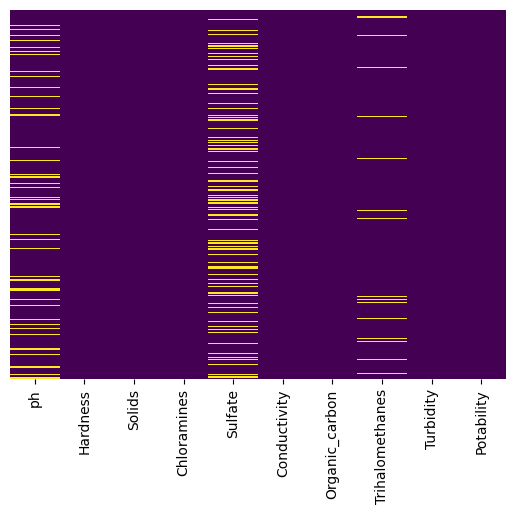

In [10]:
#Visualisasi missing value
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

# 2. Handling Missing Values

<Axes: ylabel='Frequency'>

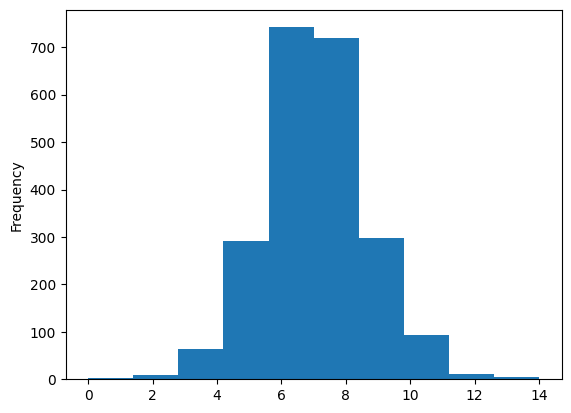

In [11]:
df['ph'].plot(kind= 'hist')

<Axes: ylabel='Frequency'>

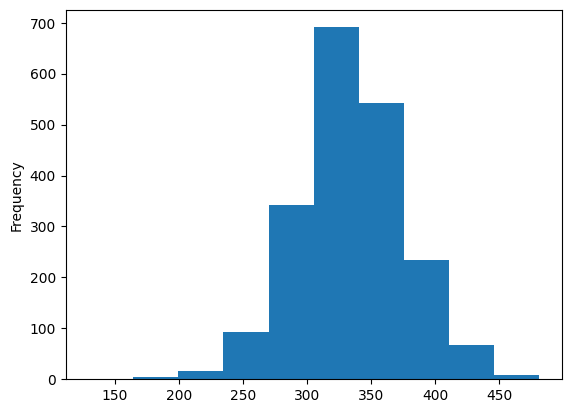

In [12]:
df['Sulfate'].plot(kind= 'hist')

<Axes: ylabel='Frequency'>

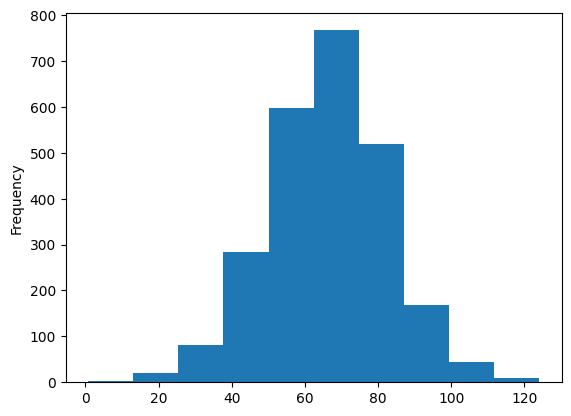

In [13]:
df['Trihalomethanes'].plot(kind= 'hist')

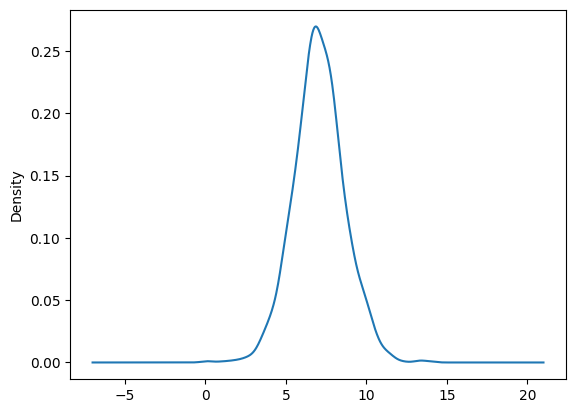

In [14]:
# ph, Sulfate & Trihalomethane data distribution is similar to normal distribution, so we will use "mean" to fill the missing values
fig = plt.figure()
ax = fig.add_subplot(111)
df['ph'].plot(kind= 'kde', ax=ax)
plt.show()

In [15]:
#missing values imputeation with mean
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())


In [16]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


## Check for Correlation

In [17]:
corr_matrix = df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.100119,-0.095245,-0.029395,-0.004599,0.023249,0.042417,0.003985,-0.019121,-0.017462
Hardness,0.100119,1.000000,-0.068997,-0.029451,-0.103964,-0.015325,0.011500,-0.024434,-0.006441,-0.008904
Solids,-0.095245,-0.068997,1.000000,-0.072097,-0.144395,0.014450,0.007705,-0.004619,0.012661,0.036320
Chloramines,-0.029395,-0.029451,-0.072097,1.000000,0.028463,-0.018341,-0.017692,0.015233,-0.006820,0.016667
Sulfate,-0.004599,-0.103964,-0.144395,0.028463,1.000000,-0.018331,0.052781,-0.021105,-0.004629,-0.032583
Conductivity,0.023249,-0.015325,0.014450,-0.018341,-0.018331,1.000000,0.040572,0.000094,0.004164,-0.008071
Organic_carbon,0.042417,0.011500,0.007705,-0.017692,0.052781,0.040572,1.000000,-0.006842,-0.008384,-0.024479
Trihalomethanes,0.003985,-0.024434,-0.004619,0.015233,-0.021105,0.000094,-0.006842,1.000000,-0.033637,0.009439
Turbidity,-0.019121,-0.006441,0.012661,-0.006820,-0.004629,0.004164,-0.008384,-0.033637,1.000000,0.003172
Potability,-0.017462,-0.008904,0.036320,0.016667,-0.032583,-0.008071,-0.024479,0.009439,0.003172,1.000000


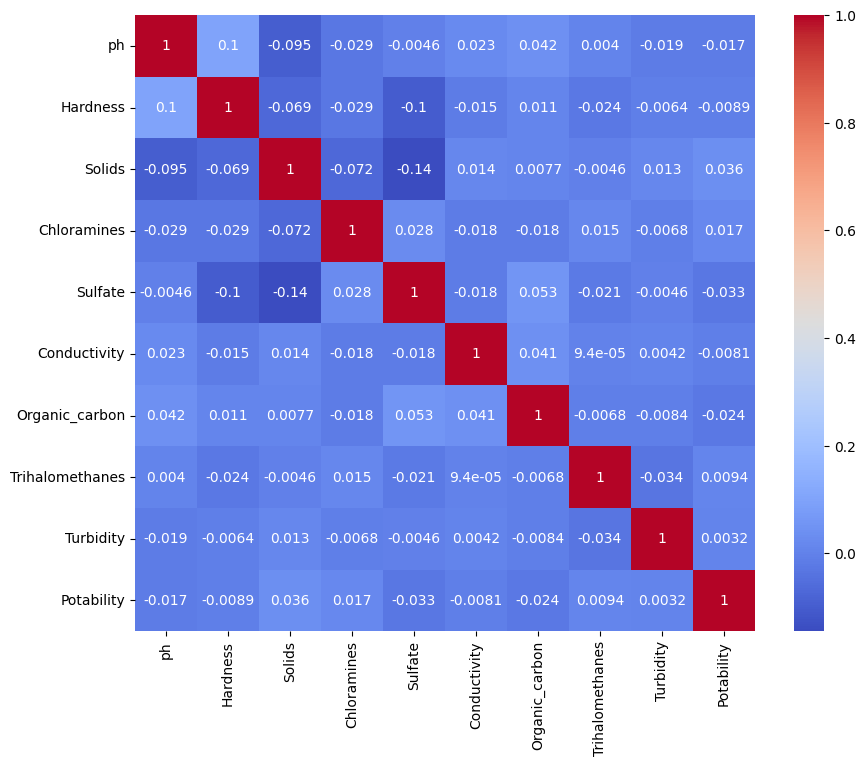

In [18]:
#visualisasi correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show() #tidak ada korelasi significant antar variable, shg semua fitur bisa dipakai

In [19]:
corr_matrix1 = corr_matrix.abs()
upper_tri = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape),k=1).astype(bool))
upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.100119,0.095245,0.029395,0.004599,0.023249,0.042417,0.003985,0.019121,0.017462
Hardness,NaN,NaN,0.068997,0.029451,0.103964,0.015325,0.011500,0.024434,0.006441,0.008904
Solids,NaN,NaN,NaN,0.072097,0.144395,0.014450,0.007705,0.004619,0.012661,0.036320
Chloramines,NaN,NaN,NaN,NaN,0.028463,0.018341,0.017692,0.015233,0.006820,0.016667
Sulfate,NaN,NaN,NaN,NaN,NaN,0.018331,0.052781,0.021105,0.004629,0.032583
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.040572,0.000094,0.004164,0.008071
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006842,0.008384,0.024479
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033637,0.009439
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003172
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

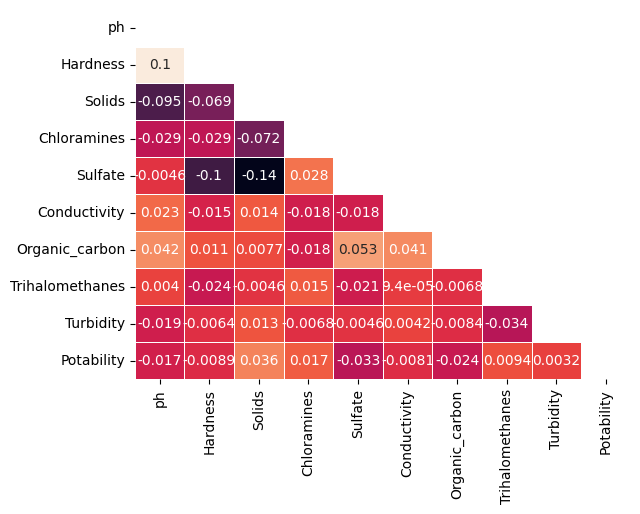

In [20]:
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='rocket', mask=matrix, cbar=False)


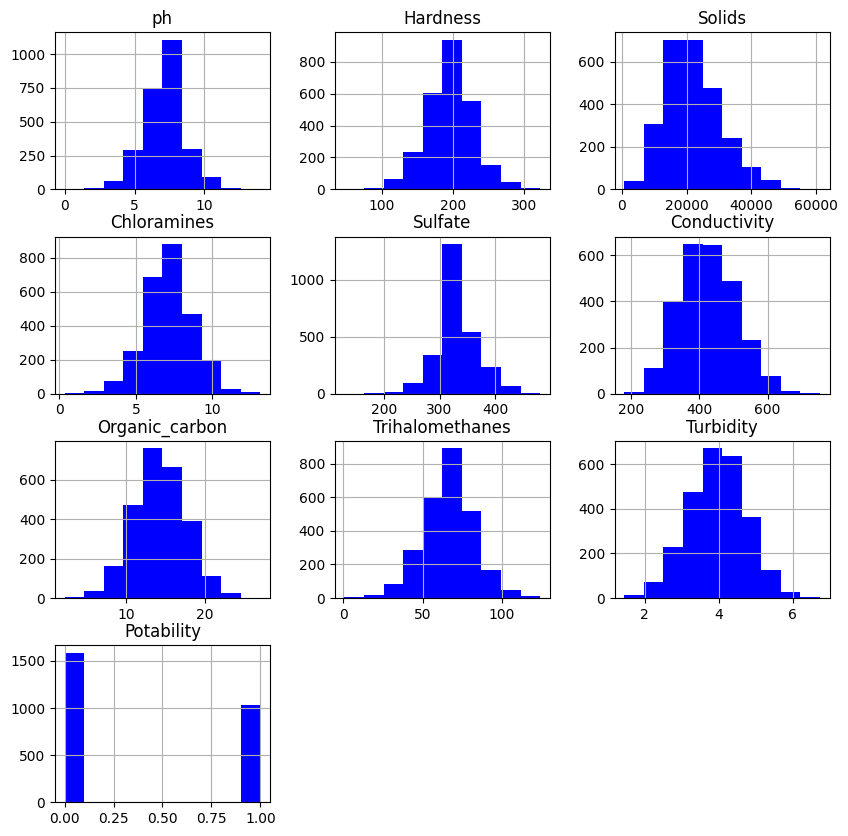

In [21]:
data_hist_plot = df.hist(figsize=(10,10), color = 'blue')
# semua data masih termasuk normal distribution

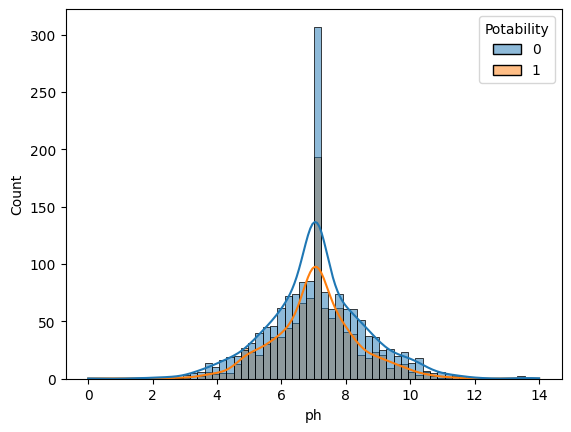

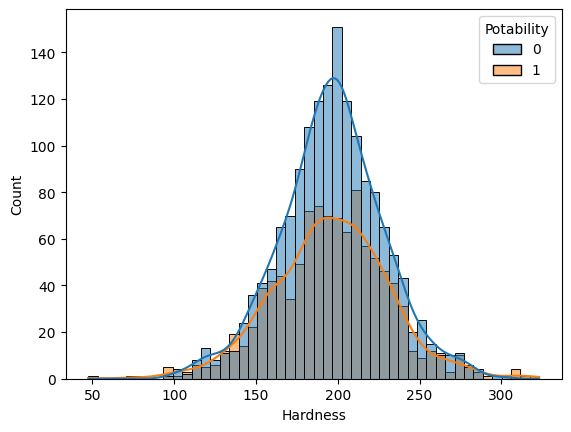

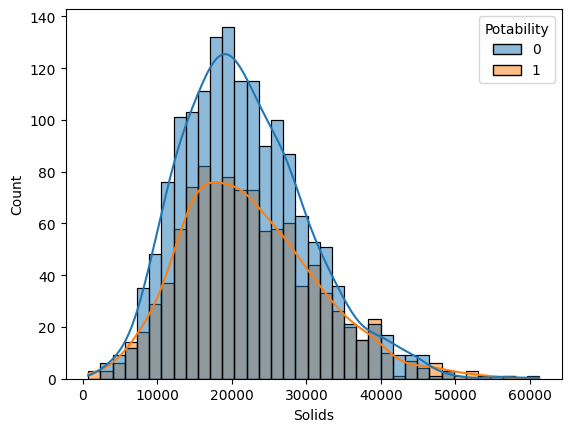

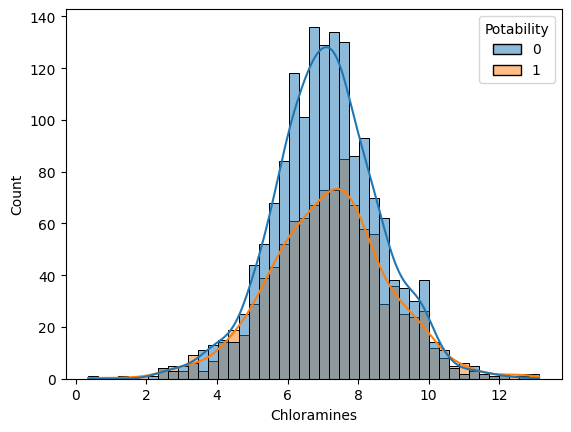

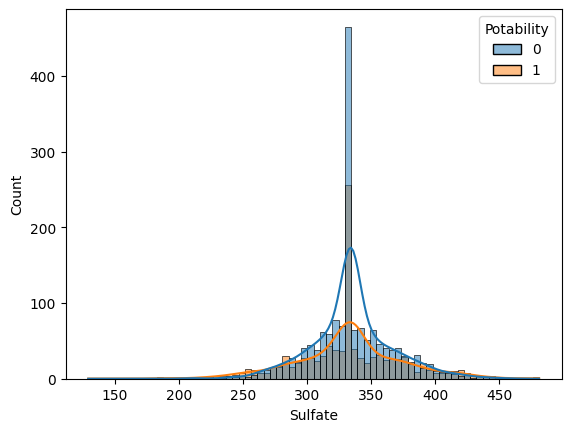

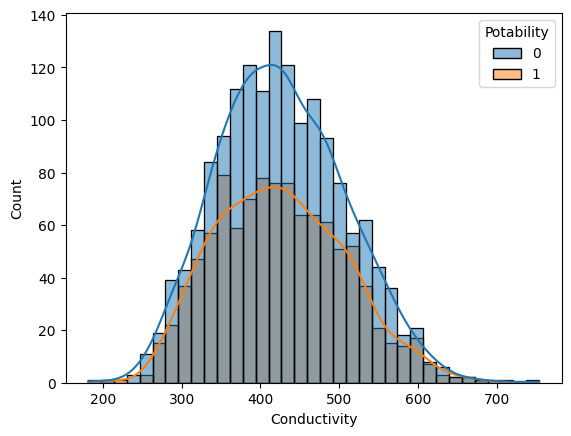

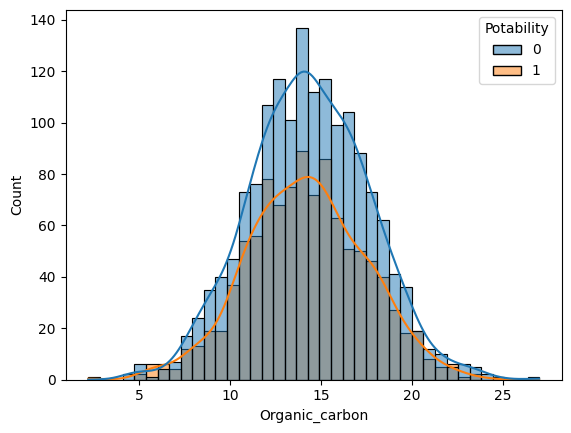

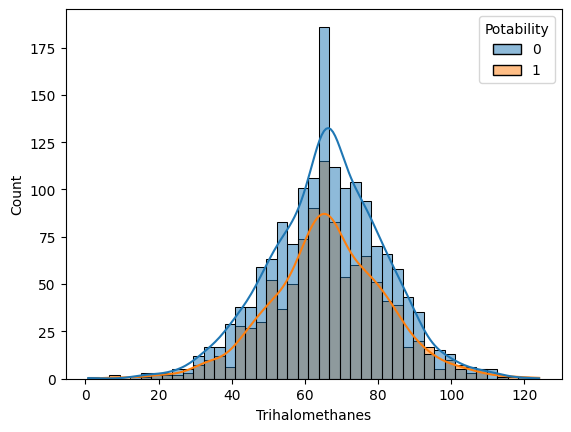

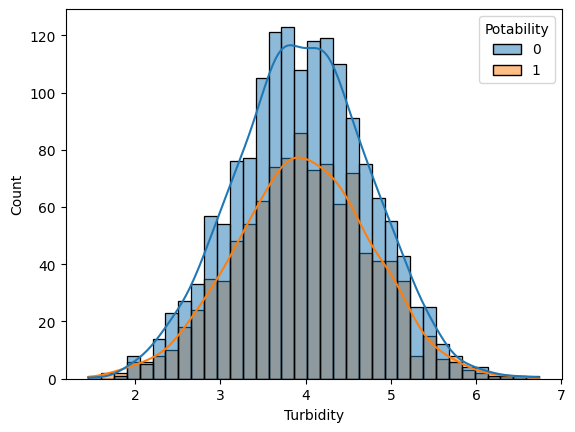

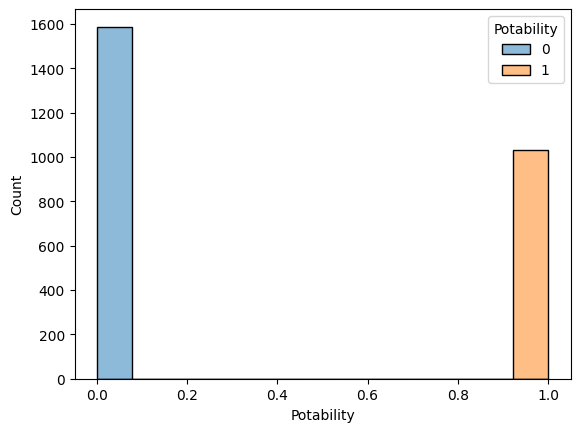

In [22]:
for col in df.columns:
    sns.histplot(data=df, x=col, kde=True, hue='Potability')
    plt.show()

In [23]:
df.groupby('Potability').mean().T

Potability,0,1
ph,7.091679,7.039293
Hardness,196.438919,195.835257
Solids,21718.420647,22365.067929
Chloramines,7.109496,7.163512
Sulfate,334.995282,332.574740
Conductivity,426.277195,424.938986
Organic_carbon,14.357097,14.193180
Trihalomethanes,66.073845,66.378877
Turbidity,3.963645,3.968728


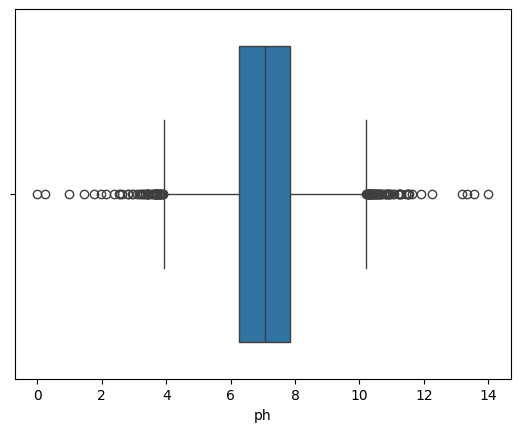

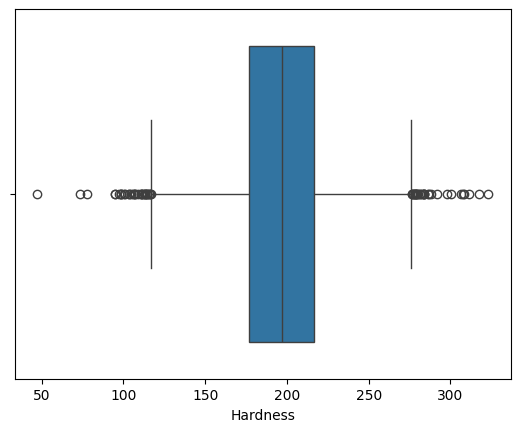

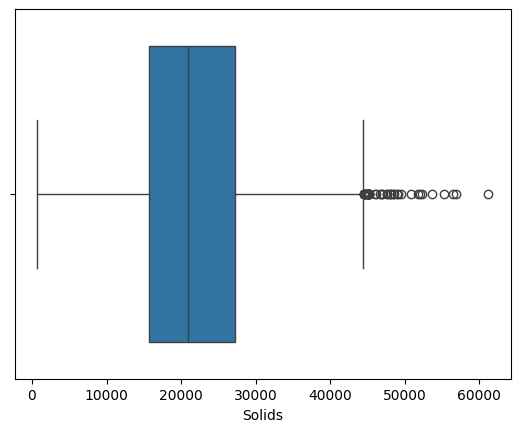

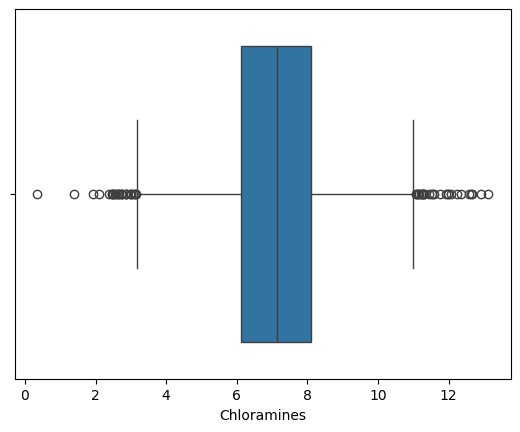

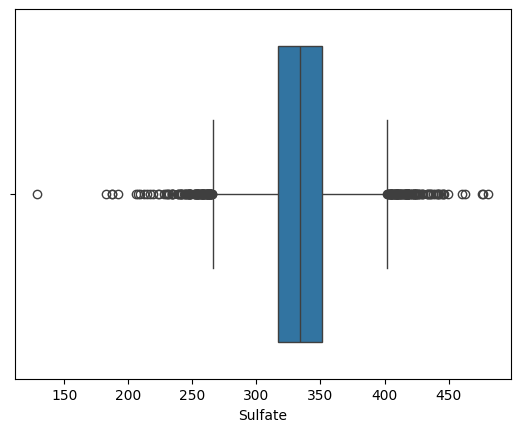

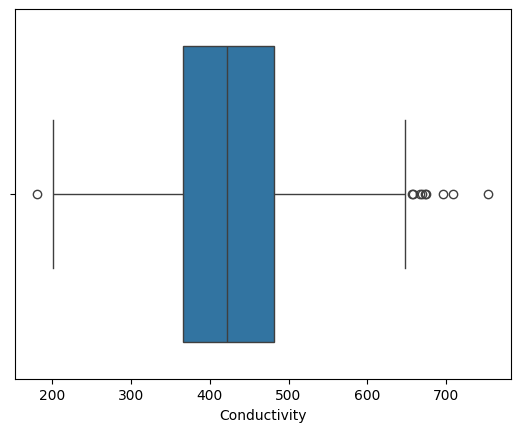

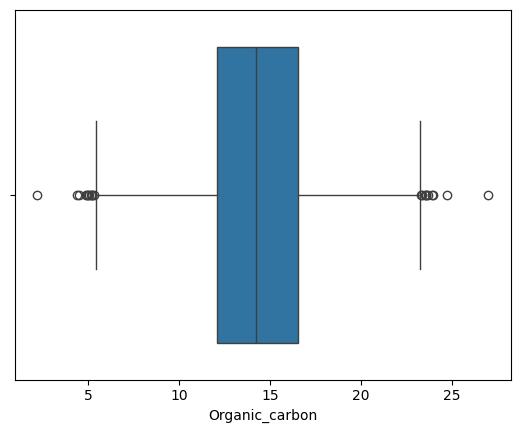

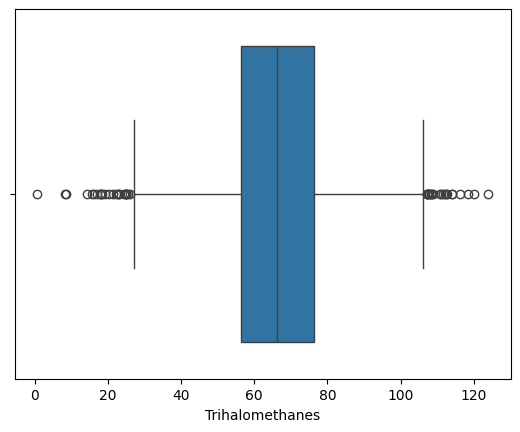

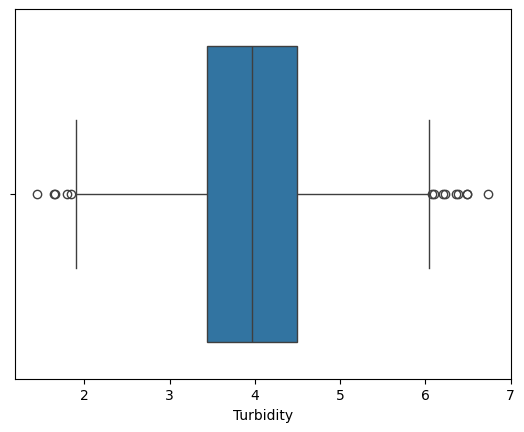

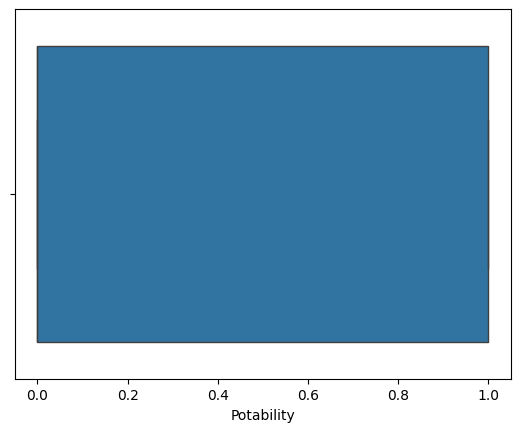

In [24]:
#membuat boxplot
for col in df.columns:
    sns.boxplot(data=df, x=col)
    plt.show()

<Axes: xlabel='Potability'>

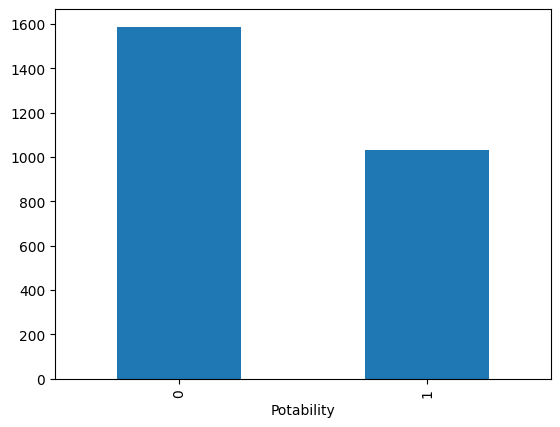

In [25]:
df['Potability'].value_counts().plot(kind = 'bar')

## 3. Data Preprocessing

In [26]:
X = df.drop('Potability', axis=1) #variable
y = df['Potability'] #target

In [27]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.150553,212.819377,15017.747281,5.544436,319.494952,279.447066,12.850506,75.028793,4.810537
1,7.071024,180.680598,8692.538152,8.671793,396.528754,534.339086,10.299787,87.652015,3.913602
2,5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699
3,7.647872,160.774353,29000.589712,7.217409,334.040923,438.800961,13.182501,67.099969,3.078673
4,8.129586,177.898967,27834.217696,9.006008,334.438539,397.021428,15.936262,81.390758,3.362537


In [28]:
y.head()

,Potability
0,0
1,0
2,1
3,1
4,0


## Feature Scalling :

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-6.27829198e-01,  5.01596141e-01, -7.99420465e-01, ...,
        -4.40650928e-01,  5.59436546e-01,  1.07897320e+00],
       [-6.05803161e-16, -4.68450480e-01, -1.52638575e+00, ...,
        -1.22012764e+00,  1.35877402e+00, -6.64677871e-02],
       [-1.17787810e+00,  6.57457372e-02, -9.74680133e-01, ...,
        -6.35874872e-02, -3.04020786e-01,  1.77574349e-01],
       ...,
       [-1.00544094e+00, -1.01041522e+00,  2.24920469e-01, ...,
         1.49197785e+00, -7.10975130e-01, -5.86023680e-01],
       [-7.81986408e-01, -2.89179107e-01,  2.57478683e+00, ...,
        -4.68884576e-01, -4.26632169e-01,  3.30366948e-01],
       [ 5.77759341e-01, -6.29729378e-01,  8.72597719e-01, ...,
        -9.11646298e-01,  2.48392118e-01,  8.61241773e-01]])

## Training and Testing Dataset

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [31]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2096, 9), (524, 9), (2096,), (524,))

## Model Development
  #List Models:
  1. Logistic Regression
  2. Decision TreeClassifier
  3. RandomForestClassifier
  4. ExtraTreesClassifier
  5. Support Vector Classifier
  6. KNeighborsClassifier
  7. GradientBoostingClassifier
  8. Naive-Bayes
  9. AdaBoostClassifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

## Create object of the Model

In [33]:
LR = LogisticRegression
DT = DecisionTreeClassifier
RFC = RandomForestClassifier
ETC = ExtraTreesClassifier
SVC = SVC
KNN = KNeighborsClassifier
GB = GradientBoostingClassifier
NB = GaussianNB
ABC = AdaBoostClassifier

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# Asumsi kamu sudah punya `features`, `labels`, dan `CV`
# dan sudah mengimpor model-model yang diperlukan, contoh:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC

# Contoh variabel `models` yang berisi KELAS model:
# models = [LogisticRegression, RandomForestClassifier, SVC] # <-- Perhatikan, tanpa `()`
models = [LR, DT, RFC, ETC, SVC, KNN, GB, NB, ABC]
features = X_scaled
labels = y
CV = 5
accu_list = []
model_Name = []

for ModelClass in models: # Di sini, `ModelClass` adalah KELAS (misal: LogisticRegression)
  # Langkah PENTING: Buat instance (objek) dari kelas model
  model_instance = ModelClass() # <--- INI KUNCI PERBAIKANNYA!

  # Ambil nama model dari kelasnya
  model_name = ModelClass.__name__

  # Sekarang, berikan `model_instance` (objek) ke cross_val_score
  accuracies = cross_val_score(model_instance, features, labels, scoring='accuracy', cv=CV)

  accu_list.append(accuracies.mean()*100)
  model_Name.append(model_name)

print("Akurasi Model:")
for i in range(len(model_Name)):
    print(f"- {model_Name[i]}: {accu_list[i]:.2f}%")


Akurasi Model:
- LogisticRegression: 60.65%
- DecisionTreeClassifier: 57.40%
- RandomForestClassifier: 65.08%
- ExtraTreesClassifier: 65.95%
- SVC: 66.87%
- KNeighborsClassifier: 62.06%
- GradientBoostingClassifier: 63.36%
- GaussianNB: 61.60%
- AdaBoostClassifier: 61.91%


In [36]:
from sklearn.metrics import classification_report

In [37]:
print(f"Type of SVC before fit: {type(SVC)}")
print(f"Type of ET before fit: {type(ETC)}")
print(f"Type of RF before fit: {type(RFC)}")

Type of SVC before fit: <class 'abc.ABCMeta'>
Type of ET before fit: <class 'abc.ABCMeta'>
Type of RF before fit: <class 'abc.ABCMeta'>


In [38]:
# 1. Pastikan kamu sudah mengimpor kelas model yang benar
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

# 2. Inisialisasi (buat instance) dari setiap model
#    Ini adalah langkah KUNCI untuk memperbaiki masalahmu!
#    Pastikan kamu menggunakan tanda kurung () setelah nama kelas.
svc_model_instance = SVC()
etc_model_instance = ExtraTreesClassifier()
rfc_model_instance = RandomForestClassifier()

# Kamu juga bisa menambahkan parameter di sini jika diperlukan, contoh:
svc_model_instance = SVC(kernel='rbf', C=1.0, random_state=42)
etc_model_instance = ExtraTreesClassifier(n_estimators=100, random_state=42)
rfc_model_instance = RandomForestClassifier(n_estimators=100, random_state=42)

# 3. Latih model menggunakan instance yang sudah dibuat
#    Gunakan nama variabel instance yang baru (misal: svc_model_instance)
svc_model_instance.fit(x_train, y_train)
etc_model_instance.fit(x_train, y_train)
rfc_model_instance.fit(x_train, y_train)

# 4. Lakukan prediksi menggunakan instance yang sudah dibuat
y_pred_svc = svc_model_instance.predict(x_test)
y_pred_etc = etc_model_instance.predict(x_test)
y_pred_rf = rfc_model_instance.predict(x_test)

In [39]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.67      0.93      0.78       320
           1       0.71      0.27      0.39       204

    accuracy                           0.67       524
   macro avg       0.69      0.60      0.58       524
weighted avg       0.68      0.67      0.63       524



In [40]:
print(classification_report(y_test, y_pred_etc))

              precision    recall  f1-score   support

           0       0.65      0.88      0.75       320
           1       0.59      0.27      0.37       204

    accuracy                           0.64       524
   macro avg       0.62      0.58      0.56       524
weighted avg       0.63      0.64      0.60       524



In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.66      0.84      0.74       320
           1       0.56      0.32      0.41       204

    accuracy                           0.64       524
   macro avg       0.61      0.58      0.57       524
weighted avg       0.62      0.64      0.61       524



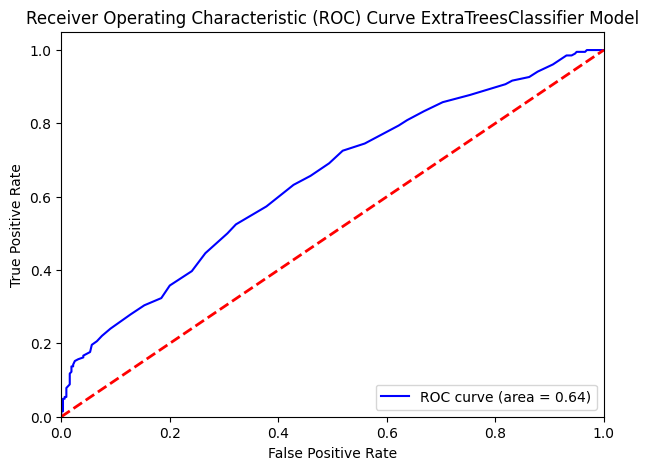

In [42]:
from sklearn.metrics import roc_curve, auc
y_scores = etc_model_instance.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve ExtraTreesClassifier Model')
plt.legend(loc="lower right")
plt.show()

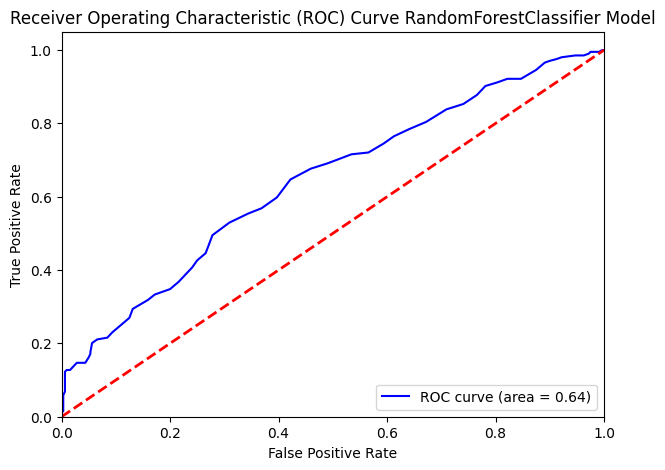

In [43]:
from sklearn.metrics import roc_curve, auc
y_scores = rfc_model_instance.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve RandomForestClassifier Model')
plt.legend(loc="lower right")
plt.show()

## Chosen Model - Random Forest

In [44]:
# Pastikan kamu sudah mengimpor kelas model yang benar
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# 1. Inisialisasi (buat instance) dari model RandomForestClassifier
#    Ini adalah langkah KUNCI untuk memperbaiki masalahmu!
#    Berikan instance ini ke GridSearchCV.
rfc_model = RandomForestClassifier(random_state=42) # Tambahkan random_state untuk reproducibility

params_RFC = {'min_samples_split':[2, 6],
              'min_samples_leaf': [1, 4],
              'n_estimators':[100, 200, 300], # Perbaikan: 'n_estimator' menjadi 'n_estimators'
              'criterion':['gini', 'entropy']
              }

cv_method = StratifiedKFold(n_splits=3)

# 2. Berikan instance model (rfc_model) ke parameter 'estimator'
GridSearchCV_RFC = GridSearchCV(estimator=rfc_model, # Ganti RFC dengan rfc_model
                                param_grid=params_RFC,
                                cv=cv_method,
                                verbose=1,
                                n_jobs=2,
                                scoring='accuracy',
                                return_train_score=True
                                )

GridSearchCV_RFC.fit(x_train, y_train)
best_params_RFC = GridSearchCV_RFC.best_params_
print('Best Parameters for Random Forest are = ', best_params_RFC)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Random Forest are =  {'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


In [45]:
best_estimator = GridSearchCV_RFC.best_estimator_
best_estimator

RandomForestClassifier(min_samples_split=6, n_estimators=200, random_state=42)

In [46]:
best_estimator = GridSearchCV_RFC.best_estimator_
best_estimator.fit(x_train, y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test, y_pred_best))
#

              precision    recall  f1-score   support

           0       0.66      0.83      0.74       320
           1       0.55      0.33      0.41       204

    accuracy                           0.64       524
   macro avg       0.61      0.58      0.57       524
weighted avg       0.62      0.64      0.61       524



In [47]:
from sklearn.metrics import accuracy_score

# Hitung akurasi dan kalikan 100
accuracy_percentage = accuracy_score(y_test, y_pred_best) * 100

# Cetak menggunakan f-string dengan format .2f
print(f"Accuracy Score of Random Forest Model = {accuracy_percentage:.2f}%")


Accuracy Score of Random Forest Model = 63.55%


## Make a Predictive System

In [48]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [49]:
list1 = df.iloc[2:3, 0:9].values.flatten().tolist()
list1

[5.344116870389696,
 198.37914369451653,
 13492.840835026833,
 6.559265111493522,
 328.648845176312,
 591.3633685043594,
 14.084388259548462,
 61.39298286397647,
 4.104698560797167]

In [ ]:
ph = float(input('Masukkan nilai pH: '))
Hardness = float(input('Masukkan nilai Hardness: '))
Solids = float(input('Masukkan nilai Solids: '))
Chloramines = float(input('Masukkan nilai Chloramines: '))
Sulfate = float(input('Masukkan nilai Sulfate: '))
Conductivity = float(input('Masukkan nilai Conductivity: '))
Organic_carbon = float(input('Masukkan nilai Organic_carbon: '))
Trihalomethanes = float(input('Masukkan nilai Trihalomethanes: '))
Turbidity = float(input('Masukkan nilai Turbidity'))

In [ ]:
input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
              Organic_carbon, Trihalomethanes, Turbidity]

In [ ]:
import numpy as np
std_scaler = StandardScaler()
std_scaler.fit(x_train)
df_input = std_scaler.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
              Organic_carbon, Trihalomethanes, Turbidity]])

print("Transformed input data:", df_input)

In [ ]:
model_prediction = best_estimator.predict(df_input)
model_prediction

In [ ]:
if model_prediction[0] == 0:
    print('Water is unpotable / tidak layak minum')
else:
    print('Water is potable')

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)
df_input = std_scaler.transform([[ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
              Organic_carbon, Trihalomethanes, Turbidity]])
def water_quality_Prediction(input_data):
    scaled_data = std_scaler.transform([input_data])
    std_scaler.fit(x_train)
    model_prediction = best_estimator.predict(scaled_data)
    if model_prediction[0] == 0:
        print('Water is unpotable / tidak layak minum')
        return 'Water is unpotable / tidak layak minum'
    else:
        print('Water is potable')

In [ ]:
ph = float(input('Masukkan nilai pH: '))
Hardness = float(input('Masukkan nilai Hardness: '))
Solids = float(input('Masukkan nilai Solids: '))
Chloramines = float(input('Masukkan nilai Chloramines: '))
Sulfate = float(input('Masukkan nilai Sulfate: '))
Conductivity = float(input('Masukkan nilai Conductivity: '))
Organic_carbon = float(input('Masukkan nilai Organic_carbon: '))
Trihalomethanes = float(input('Masukkan nilai Trihalomethanes: '))
Turbidity = float(input('Masukkan nilai Turbidity'))

input_data = [ph, Hardness, Solids, Chloramines, Sulfate, Conductivity,
              Organic_carbon, Trihalomethanes, Turbidity]
water_quality_Prediction(input_data)

## SAVE TRAINED MODEL

In [ ]:
import pickle

In [ ]:
filename = 'water_quality_Train.sav'
pickle.dump(best_estimator, open(filename, 'wb'))
#

## LOAD TRAINED MODEL

In [ ]:
water_quality_Prediction = pickle.load(open('water_quality_Train.sav', 'rb'))

In [ ]:
data = [5.344117,198.379144,13492.840835,6.559265,328.648845,591.363369,14.084388,61.392983,4.104699]
scaled_data1 = StandardScaler.transform([data])
water_quality_Prediction.predict(scaled_data1)